In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn import metrics

In [2]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [3]:
X, y = X_iris[:,:2], y_iris
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)

In [4]:
#Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

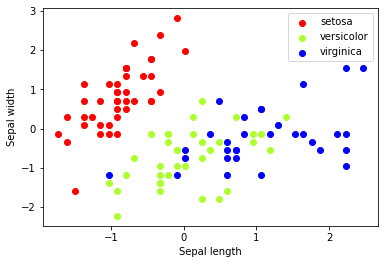

In [5]:
colors = ['red','greenyellow','blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train ==i]
    ys = X_train[:, 1][y_train ==i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [6]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-22.32168058  11.64739193]
 [  1.35235235  -7.41022253]
 [  7.12003003   0.94265343]]
[-12.84238536  -0.37983512  -2.46911653]


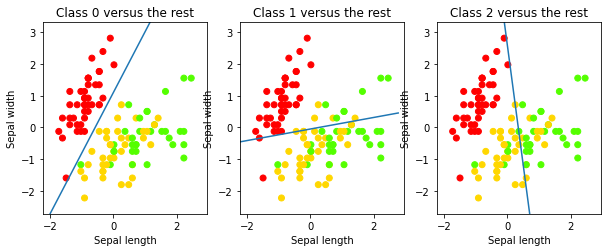

In [12]:
x_min, x_max = X_train[:, 0].min()-.5,X_train[:,0].max()+.5
y_min, y_max = X_train[:, 1].min()-.5,X_train[:,1].max()+.5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [13]:
print(clf.predict(scaler.transform([[4.7,3.1]])))

[0]


In [14]:
print(clf.decision_function(scaler.transform([[4.7,3.1]])))

[[ 16.25586372  -2.70919654 -11.35716225]]


In [18]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.8660714285714286


In [19]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
print(metrics.confusion_matrix(y_test, y_pred) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.45      0.45      0.45        11
   virginica       0.68      0.68      0.68        19

    accuracy                           0.68        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.68      0.68      0.68        38

[[ 8  0  0]
 [ 0  5  6]
 [ 0  6 13]]


In [20]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Saranpat Prasertthum
My NetID is: 655667271
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
